In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split

In [18]:
from sklearn.cluster import KMeans

In [5]:
Df=pd.read_csv("mall-customers-data.csv")

In [19]:
Df
np.random.seed(5)

In [9]:
Df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
Df.describe(include='all')


,customer_id,gender,age,annual_income,spending_score
count,200.000000,200,200.000000,200.000000,200.000000
unique,NaN,2,NaN,NaN,NaN
top,NaN,Female,NaN,NaN,NaN
freq,NaN,112,NaN,NaN,NaN
mean,100.500000,NaN,38.850000,60.560000,50.200000
std,57.879185,NaN,13.969007,26.264721,25.823522
min,1.000000,NaN,18.000000,15.000000,1.000000
25%,50.750000,NaN,28.750000,41.500000,34.750000
50%,100.500000,NaN,36.000000,61.500000,50.000000
75%,150.250000,NaN,49.000000,78.000000,73.000000


In [14]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [16]:
Df.isna().sum().sum()


0

In [17]:
Df.duplicated().sum()


0

C:\Users\akhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\akhil\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

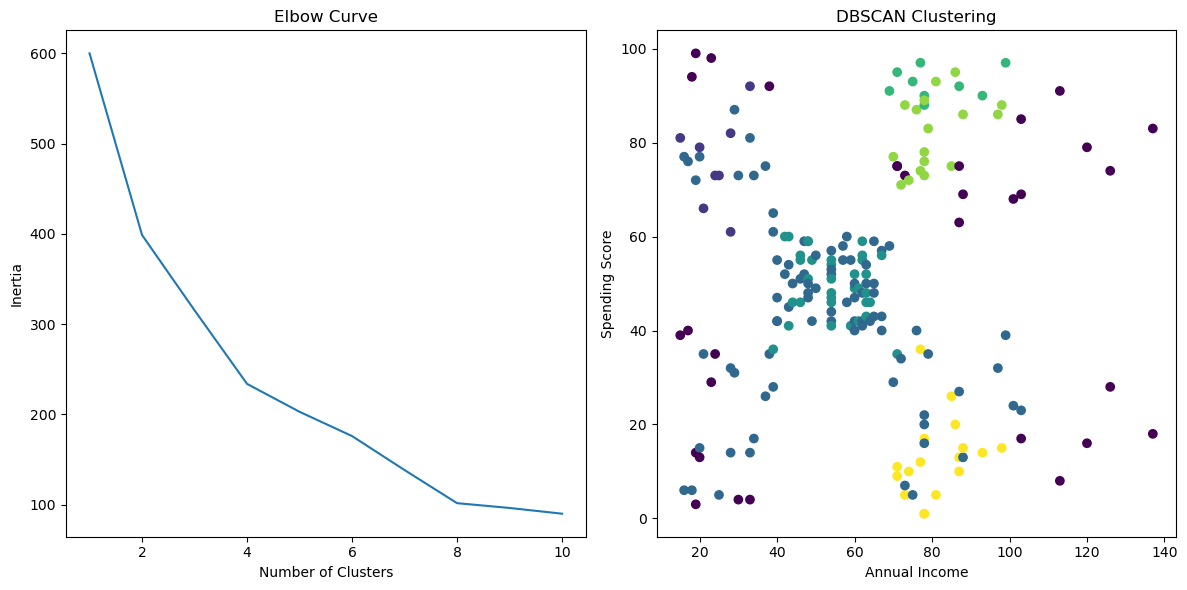

     customer_id  gender  age  annual_income  spending_score  kmeans_cluster  \
0              1       0   19             15              39               0   
1              2       0   21             15              81               0   
2              3       1   20             16               6               2   
3              4       1   23             16              77               4   
4              5       1   31             17              40               2   
..           ...     ...  ...            ...             ...             ...   
195          196       1   35            120              79               1   
196          197       1   45            126              28               3   
197          198       0   32            126              74               1   
198          199       0   32            137              18               3   
199          200       0   30            137              83               1   

     dbscan_cluster  
0                

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler

os.environ["OMP_NUM_THREADS"] = "1"

df = pd.read_csv('mall-customers-data.csv')

df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Excluding 'age' from the scaling and clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['annual_income', 'spending_score', 'gender']])

# KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(scaled_data)

# Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans_temp = KMeans(n_clusters=i, random_state=42)
    kmeans_temp.fit(scaled_data)
    inertia.append(kmeans_temp.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(scaled_data)

# Plotting DBSCAN clustering results
plt.subplot(1, 2, 2)
plt.scatter(df['annual_income'], df['spending_score'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

print(df)
